In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [2]:
# Set up font properties
from matplotlib import rc, font_manager
fontProperties = {'family':'sans-serif','sans-serif':['Arial'],
    'weight' : 'normal', 'size' : 20}
ticks_font = font_manager.FontProperties(family='Arial', style='normal',
    size=20, weight='normal', stretch='normal')
plt.rc('font',**fontProperties)

**Import data**

In [3]:
data = pd.read_excel('Memory conformity Raw data.xlsx', sheet_name='Data', index_col='Participant')

In [4]:
data

,Group,Video,VideoName,StudyTest,Order,R0,R1,C1,R2,C2,R3,C3
Participant,,,,,,,,,,,,
1,1,26,1,Target,79,19,51,49,54,60,75,80
1,1,10,2,Foil,1,7,-3,-68,-13,20,-18,41
1,1,8,3,Foil,8,19,6,82,-2,-67,-13,-20
1,1,22,4,Target,25,-6,21,20,26,30,41,49
1,1,40,5,Foil,74,-29,-42,-57,-56,-76,-66,-92
...,...,...,...,...,...,...,...,...,...,...,...,...
38,0,6,86,Foil,81,0,0,28,100,45,100,56
38,0,3,87,Foil,89,0,0,-4,0,3,0,-2
38,0,17,88,Foil,55,-100,-100,-93,-100,-99,-100,-92


In [5]:
#Calculate (C-Rpre) and (Rpost-Rpre) values

data["C1-R0"] = data["C1"]-data["R0"]
data["C2-R1"] = data["C2"]-data["R1"]
data["C3-R2"] = data["C3"]-data["R2"]

data["C2-R0"] = data["C2"]-data["R0"]
data["C3-R0"] = data["C3"]-data["R0"]

data["R1-R0"] = data["R1"]-data["R0"]
data["R2-R1"] = data["R2"]-data["R1"]
data["R3-R2"] = data["R3"]-data["R2"]

data["CI 1"] = data["R1-R0"]/data["C1-R0"]
data["CI 2"] = data["R2-R1"]/data["C2-R1"]
data["CI 3"] = data["R3-R2"]/data["C3-R2"]

In [6]:
data

,Group,Video,VideoName,StudyTest,Order,R0,R1,C1,R2,C2,...,C2-R1,C3-R2,C2-R0,C3-R0,R1-R0,R2-R1,R3-R2,CI 1,CI 2,CI 3
Participant,,,,,,,,,,,,,,,,,,,,,
1,1,26,1,Target,79,19,51,49,54,60,...,9,26,41,61,32,3,21,1.066667,0.333333,0.807692
1,1,10,2,Foil,1,7,-3,-68,-13,20,...,23,54,13,34,-10,-10,-5,0.133333,-0.434783,-0.092593
1,1,8,3,Foil,8,19,6,82,-2,-67,...,-73,-18,-86,-39,-13,-8,-11,-0.206349,0.109589,0.611111
1,1,22,4,Target,25,-6,21,20,26,30,...,9,23,36,55,27,5,15,1.038462,0.555556,0.652174
1,1,40,5,Foil,74,-29,-42,-57,-56,-76,...,-34,-36,-47,-63,-13,-14,-10,0.464286,0.411765,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0,6,86,Foil,81,0,0,28,100,45,...,45,-44,45,56,0,100,0,0.000000,2.222222,-0.000000
38,0,3,87,Foil,89,0,0,-4,0,3,...,3,-2,3,-2,0,0,0,-0.000000,0.000000,-0.000000
38,0,17,88,Foil,55,-100,-100,-93,-100,-99,...,1,8,1,8,0,0,0,0.000000,0.000000,0.000000


**Sort and group data**

In [7]:
data = data.sort_values(by=['Participant','Order'])

In [8]:
data

,Group,Video,VideoName,StudyTest,Order,R0,R1,C1,R2,C2,...,C2-R1,C3-R2,C2-R0,C3-R0,R1-R0,R2-R1,R3-R2,CI 1,CI 2,CI 3
Participant,,,,,,,,,,,,,,,,,,,,,
1,1,10,2,Foil,1,7,-3,-68,-13,20,...,23,54,13,34,-10,-10,-5,0.133333,-0.434783,-0.092593
1,1,39,59,Target,2,5,11,28,24,44,...,33,39,39,58,6,13,11,0.260870,0.393939,0.282051
1,1,30,62,Target,3,-9,-21,-17,-34,-24,...,-3,-9,-15,-34,-12,-13,-10,1.500000,4.333333,1.111111
1,1,4,44,Foil,4,18,33,-20,28,41,...,8,-86,23,-76,15,-5,-15,-0.394737,-0.625000,0.174419
1,1,14,6,Foil,5,-9,-15,-35,-20,-48,...,-33,-46,-39,-57,-6,-5,-8,0.230769,0.151515,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0,16,14,Foil,86,-33,-46,-10,-46,4,...,50,68,37,55,-13,0,7,-0.565217,0.000000,0.102941
38,0,16,9,Target,87,99,100,68,100,21,...,-79,-120,-78,-119,1,0,0,-0.032258,-0.000000,-0.000000
38,0,20,89,Foil,88,0,0,22,0,39,...,39,58,39,58,0,0,49,0.000000,0.000000,0.844828


In [9]:
data_P = data.groupby(['Participant'])

In [10]:
data_P.get_group(1)

,Group,Video,VideoName,StudyTest,Order,R0,R1,C1,R2,C2,...,C2-R1,C3-R2,C2-R0,C3-R0,R1-R0,R2-R1,R3-R2,CI 1,CI 2,CI 3
Participant,,,,,,,,,,,,,,,,,,,,,
1,1,10,2,Foil,1,7,-3,-68,-13,20,...,23,54,13,34,-10,-10,-5,0.133333,-0.434783,-0.092593
1,1,39,59,Target,2,5,11,28,24,44,...,33,39,39,58,6,13,11,0.260870,0.393939,0.282051
1,1,30,62,Target,3,-9,-21,-17,-34,-24,...,-3,-9,-15,-34,-12,-13,-10,1.500000,4.333333,1.111111
1,1,4,44,Foil,4,18,33,-20,28,41,...,8,-86,23,-76,15,-5,-15,-0.394737,-0.625000,0.174419
1,1,14,6,Foil,5,-9,-15,-35,-20,-48,...,-33,-46,-39,-57,-6,-5,-8,0.230769,0.151515,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,22,7,Foil,86,43,32,38,20,21,...,-11,-19,-22,-42,-11,-12,-6,2.200000,1.090909,0.315789
1,1,28,79,Foil,87,-6,30,19,43,32,...,2,6,38,55,36,13,16,1.440000,6.500000,2.666667
1,1,9,30,Foil,88,-18,-40,-40,-48,-65,...,-25,-43,-47,-73,-22,-8,-20,1.000000,0.320000,0.465116


**Figure 3B**

[Text(0, 0, 'Trial 1'), Text(0, 0, 'Trial 2'), Text(0, 0, 'Trial 3')]

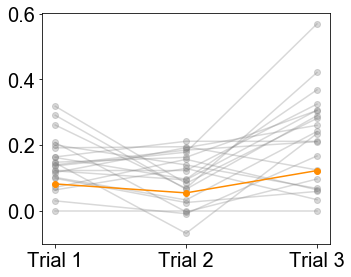

In [11]:
nvideo = 90
X = list()
Y = list()
responseT = list()
scoreT = list()
combinedT = list()

#Multiple linear regression analysis
for k, group in data_P:
    confed1 = data_P.get_group(k)["C1-R0"]
    confed2 = data_P.get_group(k)["C2-R1"]
    confed3 = data_P.get_group(k)["C3-R2"]
    response3 = data_P.get_group(k)["R3-R2"]
    for i in range(nvideo):
        X.append([confed1.values[i],confed2.values[i],confed3.values[i]])
        Y.append(response3.values[i])
    model = LinearRegression().fit(X, Y)
    Ypred = model.predict(X)
    response_i = model.coef_
    responseT.append(response_i)
    combinedT.append([response_i,model.score(X,Y)])
    X.clear()
    Y.clear()

#Generate plot
m=0
sum_trace = np.zeros(len(responseT[1]))
fig = plt.figure(figsize=(2,4))
ax = fig.add_axes([10,4,2,0.8])

for trace in combinedT:
    m=m+1
    if (trace[1]>=0.2):
        ax.plot(trace[0],'-o', label = m, alpha=0.3, c='gray')
        sum_trace = sum_trace + trace[0]
average_trace = sum_trace/m
ax.plot(average_trace, '-o', label = "Average", c='darkorange')

fig.patch.set_facecolor('white')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Trial 1', 'Trial 2', 'Trial 3'])

**Figure 3C**

C:\Users\wendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\wendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


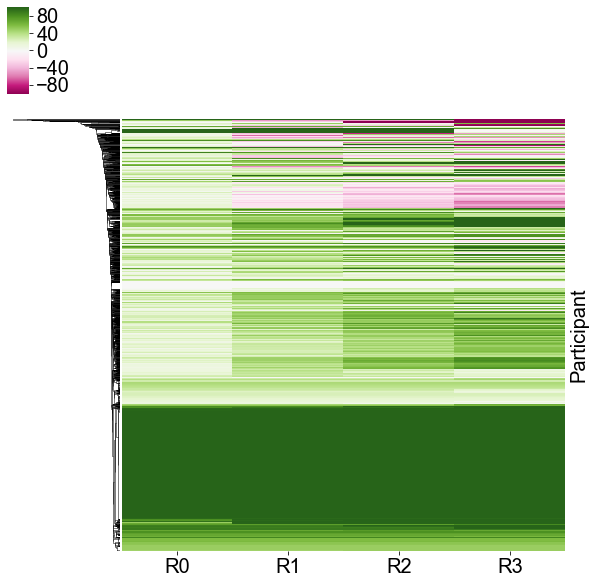

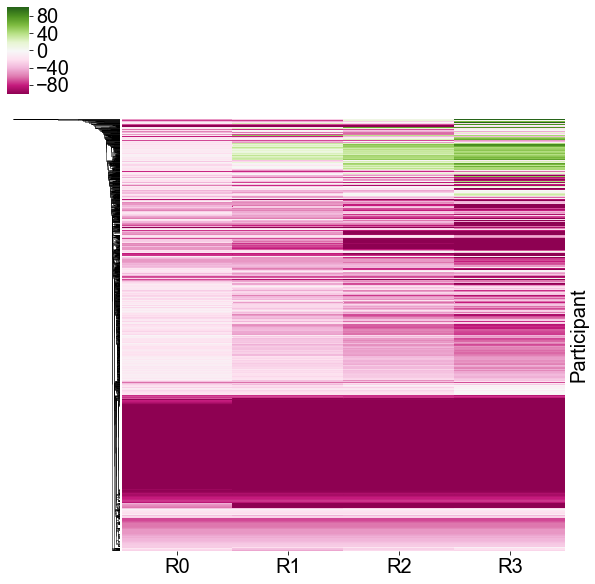

In [12]:
#Extract data
datasub = pd.DataFrame(data, columns=['R0','R1','R2','R3','C1','C2','C3'])
datasub_posC = datasub[datasub['R0']>=0]
datasub_negC = datasub[datasub['R0']<0]
datasub_pos = datasub_posC.drop(columns = ['C1','C2','C3'])
datasub_neg = datasub_negC.drop(columns = ['C1','C2','C3'])

#Generate Figure 3C
g = sns.clustermap(datasub_pos, method="single", col_cluster=False, cmap='PiYG', figsize=(10,10), yticklabels=False)
sorted_idx_pos = g.dendrogram_row.reordered_ind
datasub_posC['Order'] = sorted_idx_pos

h = sns.clustermap(datasub_neg, method="single", col_cluster=False, cmap='PiYG', figsize=(10,10), yticklabels=False)
sorted_idx_neg = h.dendrogram_row.reordered_ind
datasub_negC['Order'] = sorted_idx_neg

**Figure S3C**

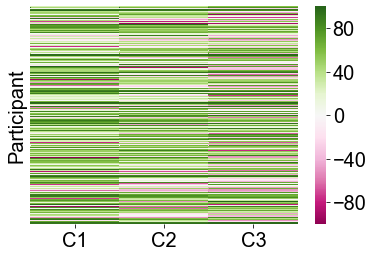

In [13]:
data_ax = datasub_posC.sort_values(by=['Order'])
data_ax = data_ax.drop(columns = ['R0','R1','R2','R3','Order'])
ax = sns.heatmap(data_ax, cmap='PiYG', center = 0, yticklabels=False)

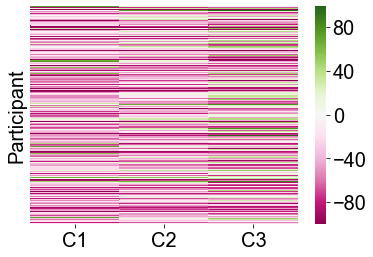

In [14]:
data_ax1 = datasub_negC.sort_values(by=['Order'])
data_ax1 = data_ax1.drop(columns = ['R0','R1','R2','R3','Order'])
ax1 = sns.heatmap(data_ax1, cmap='PiYG', center = 0, yticklabels=False)

**Figure S2**

Text(0, 0.5, 'Regression coeff.')

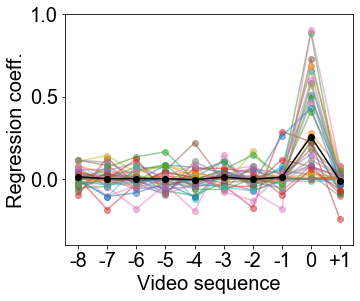

In [15]:
#Trial 1, member A
#Multiple linear regression analysis

history_length = 10
X = list()
Y = list()
responseA = list()
scoreA = list()
for k, group in data_P:
    stimulus = data_P.get_group(k)["C1-R0"]
    response = data_P.get_group(k)["R1-R0"]
    for i in range(len(stimulus)-history_length+1):
        X.append(stimulus.values[i:i+history_length])
        Y.append(response.values[i+history_length-2])
    model = LinearRegression().fit(X, Y)
    response_k = model.coef_
    responseA.append(response_k)
    scoreA.append(model.score(X,Y))
    X.clear()
    Y.clear()
    
#Generate plot
m=0
sum_trace = np.zeros(len(responseA[1]))
fig = plt.figure(figsize=(2,4))
ax = fig.add_axes([10,4,2,0.8])

for trace in responseA:
    m=m+1
    ax.plot(trace, '-o', label = m,alpha=0.5)
    sum_trace = sum_trace + trace
average_trace = sum_trace/m
plt.plot(average_trace, '-o', label = "Average", c='black')

fig.patch.set_facecolor('white')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-0.4, 1.0)
ax.set_xticklabels(['-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '+1'])
plt.xlabel('Video sequence')
plt.ylabel('Regression coeff.')

Text(0, 0.5, 'Regression coeff.')

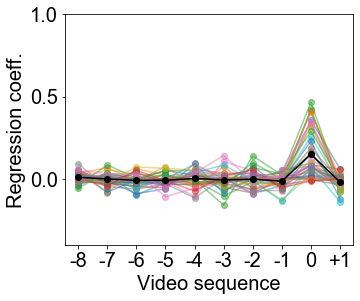

In [16]:
#Trial 2, member B
#Multiple linear regression analysis

history_length = 10
X = list()
Y = list()
responseB = list()
scoreB = list()
for k, group in data_P:
    stimulus = data_P.get_group(k)["C2-R1"]
    response = data_P.get_group(k)["R2-R1"]
    for i in range(len(stimulus)-history_length+1):
        X.append(stimulus.values[i:i+history_length])
        Y.append(response.values[i+history_length-2])
    model = LinearRegression().fit(X, Y)
    response_k = model.coef_
    responseB.append(response_k)
    scoreB.append(model.score(X,Y))
    X.clear()
    Y.clear()
    
#Generate plot
m=0
sum_trace = np.zeros(len(responseB[1]))
fig = plt.figure(figsize=(2,4))
ax = fig.add_axes([10,4,2,0.8])

for trace in responseB:
    m=m+1
    ax.plot(trace, '-o', label = m,alpha=0.5)
    sum_trace = sum_trace + trace
average_trace = sum_trace/m
plt.plot(average_trace, '-o', label = "Average", c='black')

fig.patch.set_facecolor('white')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-0.4, 1.0)
ax.set_xticklabels(['-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '+1'])
plt.xlabel('Video sequence')
plt.ylabel('Regression coeff.')

Text(0, 0.5, 'Regression coeff.')

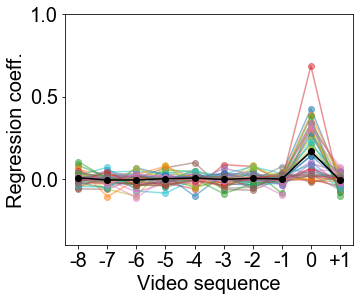

In [17]:
#Trial 3, member C
#Multiple linear regression analysis

history_length = 10
X = list()
Y = list()
responseC = list()
scoreC = list()
for k, group in data_P:
    stimulus = data_P.get_group(k)["C3-R2"]
    response = data_P.get_group(k)["R3-R2"]
    for i in range(len(stimulus)-history_length+1):
        X.append(stimulus.values[i:i+history_length])
        Y.append(response.values[i+history_length-2])
    model = LinearRegression().fit(X, Y)
    response_k = model.coef_
    responseC.append(response_k)
    scoreC.append(model.score(X,Y))
    X.clear()
    Y.clear()
    
#Generate plot
m=0
sum_trace = np.zeros(len(responseB[1]))
fig = plt.figure(figsize=(2,4))
ax = fig.add_axes([10,4,2,0.8])

for trace in responseC:
    m=m+1
    ax.plot(trace, '-o', label = m,alpha=0.5)
    sum_trace = sum_trace + trace
average_trace = sum_trace/m
plt.plot(average_trace, '-o', label = "Average", c='black')

fig.patch.set_facecolor('white')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-0.4, 1.0)
ax.set_xticklabels(['-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '+1'])
plt.xlabel('Video sequence')
plt.ylabel('Regression coeff.')

**Figure S4**

(0, 120)

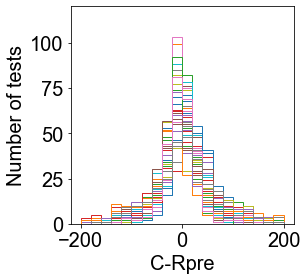

In [18]:
plt.figure(figsize=(4,4))

for i, group in data_P:
    X = data_P.get_group(i)["C1-R0"]
    Y = data_P.get_group(i)["C2-R1"]
    Z = data_P.get_group(i)["C3-R2"]
    W = pd.concat([X,Y,Z])
    plt.hist(W, bins = range(-200, 200 + 20, 20), histtype='step')
    
plt.xlabel('C-Rpre')
plt.ylabel('Number of tests')
plt.ylim(0, 120)